In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
V = [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
data = np.loadtxt("byparts/data.csv", delimiter=",")

TIME   = [] # [data[4*i].tolist() for i in range(10)]
BETAV  = [] # [data[4*i + 1].tolist() for i in range(10)]
ALPHAX = [] # [data[4*i + 2].tolist() for i in range(10)]
ALPHAV = [] # [data[4*i + 3].tolist() for i in range(10)]

for i in range(10):
    TIME.append(data[4*i].tolist())
    BETAV.append(np.abs(data[4*i + 1]).tolist())
    ALPHAX.append(data[4*i + 2].tolist())
    ALPHAV.append(data[4*i + 3].tolist())

In [3]:
INV_TIME = [[1/t for t in TIME[i]] for i in range(10)]

print(TIME[0])
print(INV_TIME[0])

[240.0, 480.0, 720.0, 960.0, 1200.0, 1440.0, 1680.0, 1920.0, 2160.0, 2400.0]
[0.004166666666666667, 0.0020833333333333333, 0.001388888888888889, 0.0010416666666666667, 0.0008333333333333334, 0.0006944444444444445, 0.0005952380952380953, 0.0005208333333333333, 0.000462962962962963, 0.0004166666666666667]


In [4]:
# RICHARDSON EXTRAPOLATION
Ah   = []
Ah_s = []

for i in range(10):
    Ah.append(np.polyfit(INV_TIME[i][:-1], BETAV[i][:-1], 2, rcond=None, full=False, w=None, cov=False)[-1])
    Ah_s.append(np.polyfit(INV_TIME[i], BETAV[i], 2, rcond=None, full=False, w=None, cov=False)[-1])
print(Ah)
print(Ah_s)

s = [TIME[i][-1]/TIME[i][-2] for i in range(10)]
print(s)

n = 2
A = [(s[i]**n * Ah_s[i] - Ah[i])/(s[i]**n - 1) for i in range(10)]
print(A)

[4.613972969100109e-05, 0.0003717660523353205, 0.0029766947374508675, 0.02381105579680089, 0.08036345121377218, 0.19048152083481132, 0.3720280056055942, 0.6428602493433758, 1.0208351817763195, 1.523809595345574]
[4.6171354163010295e-05, 0.0003718044872727263, 0.002976656243329632, 0.023810920977282348, 0.08036290179041587, 0.19048103362143842, 0.37202760557096304, 0.6428599209794115, 1.0208349081038044, 1.5238093706539027]
[1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112]
[4.630617428052322e-05, 0.00037196834147956167, 0.0029764921368127845, 0.023810346220387517, 0.08036055951189688, 0.19047895655390137, 0.3720259001601672, 0.6428585211119844, 1.0208337413946613, 1.5238084127578304]


In [5]:
fit = [np.polyfit(INV_TIME[i] + [0.0], BETAV[i] + [A[i]], 2, rcond=None, full=False, w=None, cov=False) for i in range(10)]
print(fit)

[array([3.15257939e-01, 6.55799731e-04, 4.62322116e-05]), array([6.16113511e-01, 3.82653292e-05, 3.71878451e-04]), array([ 0.79029411, -0.00111983,  0.00297658]), array([ 0.64782426, -0.00216383,  0.02381066]), array([ 0.68750004, -0.0050831 ,  0.08036184]), array([ 0.52982203, -0.00649132,  0.1904801 ]), array([ 0.4155438 , -0.00930271,  0.37202684]), array([ 0.33694929, -0.0139413 ,  0.64285929]), array([ 0.2820245 , -0.02070901,  1.02083438]), array([ 0.24311221, -0.02991609,  1.52380894])]


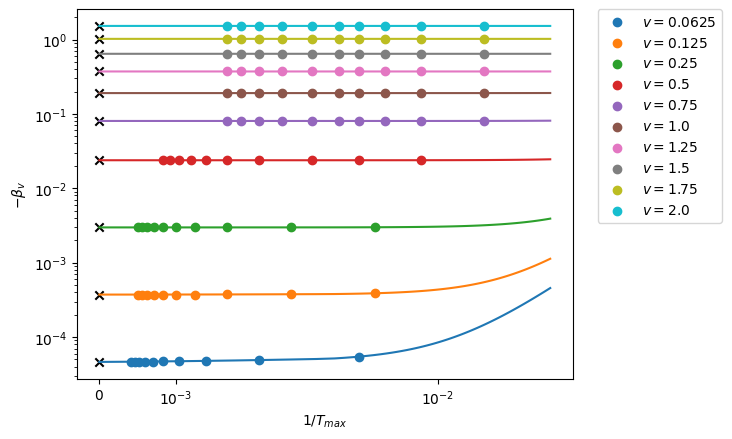

In [6]:
X = np.linspace(0.0, 0.035, num=100)
Y = [fit[i][0]*X**2 + fit[i][1]*X + fit[i][2] for i in range(10)]

for i in range(10):
    pl.plot(X, Y[i])# , label='quadratic fit')
    pl.scatter([0.0], [A[i]], marker='x', color='black') #, label='extrapolation')

pl.scatter(INV_TIME[0], BETAV[0], label=r'$v = 0.0625$')
pl.scatter(INV_TIME[1], BETAV[1], label=r'$v = 0.125$')
pl.scatter(INV_TIME[2], BETAV[2], label=r'$v = 0.25$')
pl.scatter(INV_TIME[3], BETAV[3], label=r'$v = 0.5$')
pl.scatter(INV_TIME[4], BETAV[4], label=r'$v = 0.75$')
pl.scatter(INV_TIME[5], BETAV[5], label=r'$v = 1.0$')
pl.scatter(INV_TIME[6], BETAV[6], label=r'$v = 1.25$')
pl.scatter(INV_TIME[7], BETAV[7], label=r'$v = 1.5$')
pl.scatter(INV_TIME[8], BETAV[8], label=r'$v = 1.75$')
pl.scatter(INV_TIME[9], BETAV[9], label=r'$v = 2.0$')

pl.xlabel(r'$1/T_{max}$')
pl.xscale('symlog', linthresh=0.003)
pl.ylabel(r'$-\beta _v$')
pl.yscale('log')

pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [7]:
ffit = np.polyfit(V, A, 3, rcond=None, full=False, w=None, cov=False)
ffit

array([ 1.90476151e-01, -3.53969578e-06,  7.09637332e-06, -9.38603275e-07])

Text(0.5, 0, 'v')

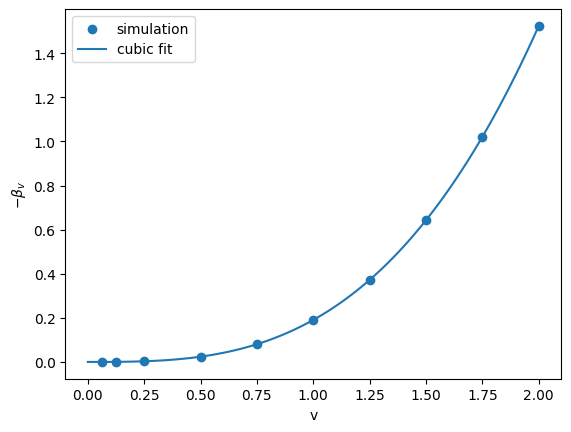

In [8]:
Z = np.linspace(0.0, 2.0, num=100)

pl.scatter(V, A, label='simulation')
pl.plot(Z, ffit[0]*Z**3 + ffit[1]*Z**2 + ffit[2]*Z + ffit[3], label='cubic fit')
pl.legend()
pl.ylabel(r'$-\beta _v$')
pl.xlabel('v')

In [9]:
# RICHARDSON EXTRAPOLATION
Bh   = []
Bh_s = []
d = 2

for i in range(10):
    Bh.append(np.polyfit(INV_TIME[i][d:-1], ALPHAX[i][d:-1], 2, rcond=None, full=False, w=None, cov=False)[-1])
    Bh_s.append(np.polyfit(INV_TIME[i][d:], ALPHAX[i][d:], 2, rcond=None, full=False, w=None, cov=False)[-1])
print(Ah)
print(Ah_s)

s = [TIME[i][-1]/TIME[i][-2] for i in range(10)]
print(s)

n = 2
B = [(s[i]**n * Bh_s[i] - Bh[i])/(s[i]**n - 1) for i in range(10)]
print(B)

[4.613972969100109e-05, 0.0003717660523353205, 0.0029766947374508675, 0.02381105579680089, 0.08036345121377218, 0.19048152083481132, 0.3720280056055942, 0.6428602493433758, 1.0208351817763195, 1.523809595345574]
[4.6171354163010295e-05, 0.0003718044872727263, 0.002976656243329632, 0.023810920977282348, 0.08036290179041587, 0.19048103362143842, 0.37202760557096304, 0.6428599209794115, 1.0208349081038044, 1.5238093706539027]
[1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112]
[0.09968223142660541, 0.12008213175003092, 0.1314485155867458, 0.176777847778164, 0.21618569948017952, 0.34908527587475746, 0.5679975174695845, 0.8945356788357369, 1.3505363138564366, 1.9552340265852444]


In [10]:
fit = [np.polyfit(INV_TIME[i][d:] + [0.0], ALPHAX[i][d:] + [B[i]], 2, rcond=None, full=False, w=None, cov=False) for i in range(10)]
print(fit)

[array([-5.13488581e+04,  3.22609280e+02,  9.78645299e-02]), array([7.07238871e+03, 7.79765524e+01, 1.19851081e-01]), array([6.50043046e+03, 1.20733376e+01, 1.31189422e-01]), array([ 9.06568291e+03, -3.21665894e+01,  1.75540178e-01]), array([ 3.80756302e+03, -2.99958634e+01,  2.14093570e-01]), array([ 8.93955607e+03, -7.99184823e+01,  3.44107691e-01]), array([ 1.74175498e+04, -1.60061447e+02,  5.58294135e-01]), array([ 3.00692652e+04, -2.78722740e+02,  8.77782915e-01]), array([ 4.77494273e+04, -4.44040979e+02,  1.32391011e+00]), array([ 7.11311021e+04, -6.62645630e+02,  1.91562144e+00])]


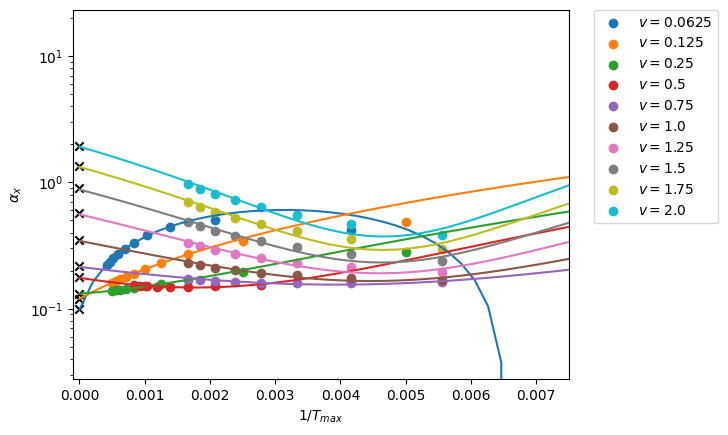

In [11]:
X = np.linspace(0.0, 0.02, num=100)
Y = [fit[i][0]*X**2 + fit[i][1]*X + fit[i][2] for i in range(10)]

for i in range(10):
    pl.plot(X, Y[i])# , label='quadratic fit')
    pl.scatter([0.0], [B[i]], marker='x', color='black') #, label='extrapolation')

pl.scatter(INV_TIME[0], ALPHAX[0], label=r'$v = 0.0625$')
pl.scatter(INV_TIME[1], ALPHAX[1], label=r'$v = 0.125$')
pl.scatter(INV_TIME[2], ALPHAX[2], label=r'$v = 0.25$')
pl.scatter(INV_TIME[3], ALPHAX[3], label=r'$v = 0.5$')
pl.scatter(INV_TIME[4], ALPHAX[4], label=r'$v = 0.75$')
pl.scatter(INV_TIME[5], ALPHAX[5], label=r'$v = 1.0$')
pl.scatter(INV_TIME[6], ALPHAX[6], label=r'$v = 1.25$')
pl.scatter(INV_TIME[7], ALPHAX[7], label=r'$v = 1.5$')
pl.scatter(INV_TIME[8], ALPHAX[8], label=r'$v = 1.75$')
pl.scatter(INV_TIME[9], ALPHAX[9], label=r'$v = 2.0$')

pl.xlabel(r'$1/T_{max}$')
pl.xlim(-0.0001, 0.0075)
# pl.xscale('symlog', linthresh=0.001)
pl.ylabel(r'$\alpha _x$')
pl.yscale('log')

pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [12]:
ffit = np.polyfit(V, B, 3, rcond=None, full=False, w=None, cov=False)
ffit

array([ 0.26757347, -0.12785373,  0.11400386,  0.10278363])

Text(0.5, 0, 'v')

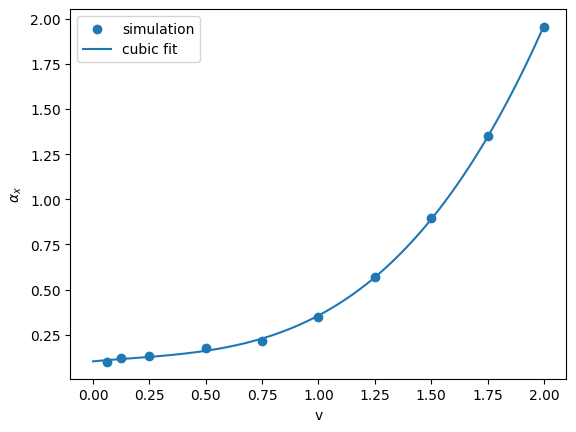

In [13]:
Z = np.linspace(0.0, 2.0, num=100)

pl.scatter(V, B, label='simulation')
pl.plot(Z, ffit[0]*Z**3 + ffit[1]*Z**2 + ffit[2]*Z + ffit[3], label='cubic fit')
pl.legend()
pl.ylabel(r'$\alpha _x$')
pl.xlabel('v')

In [14]:
# RICHARDSON EXTRAPOLATION
Ch   = []
Ch_s = []

for i in range(10):
    Ch.append(np.polyfit(INV_TIME[i][:-1], ALPHAV[i][:-1], 2, rcond=None, full=False, w=None, cov=False)[-1])
    Ch_s.append(np.polyfit(INV_TIME[i], ALPHAV[i], 2, rcond=None, full=False, w=None, cov=False)[-1])
print(Ch)
print(Ch_s)

s = [TIME[i][-1]/TIME[i][-2] for i in range(10)]
print(s)

n = 2
C = [(s[i]**n * Ch_s[i] - Ch[i])/(s[i]**n - 1) for i in range(10)]
print(C)

[0.0034482855254373977, 0.008432382506641169, 0.02372749466834877, 0.06709755895951676, 0.1229255879267403, 0.18877143569470703, 0.2629241130660214, 0.34429134825838487, 0.4320211469887489, 0.5254177472312459]
[0.0034018696167522505, 0.008424870447592974, 0.023732602633771707, 0.06710114245808561, 0.12293403457518502, 0.18877502033944218, 0.2629259407358989, 0.34429255221174365, 0.4320220916706753, 0.5254202368758016]
[1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112, 1.1111111111111112]
[0.0032039912691997794, 0.008392845353755935, 0.023754378696890545, 0.06711641947830019, 0.12297004397118627, 0.1887903022459447, 0.2629337323811662, 0.3442976848550101, 0.4320261189988879, 0.5254308506236443]


In [15]:
fit = [np.polyfit(INV_TIME[i] + [0.0], ALPHAV[i] + [C[i]], 2, rcond=None, full=False, w=None, cov=False) for i in range(10)]
print(fit)

[array([ 1.56536790e+01, -7.85416129e-01,  3.31254783e-03]), array([-1.41956894e+02,  8.74206581e-02,  8.41041440e-03]), array([-4.93673615e+01,  1.00499836e-01,  2.37424323e-02]), array([-9.82362192,  0.04009621,  0.06710804]), array([-5.83518965,  0.04826573,  0.12295029]), array([-1.92445246,  0.02258072,  0.18878192]), array([-0.59660091,  0.01389085,  0.26292946]), array([-0.05448062,  0.01065582,  0.34429487]), array([0.20782503, 0.00938153, 0.43202391]), array([0.46280244, 0.00671213, 0.52542503])]


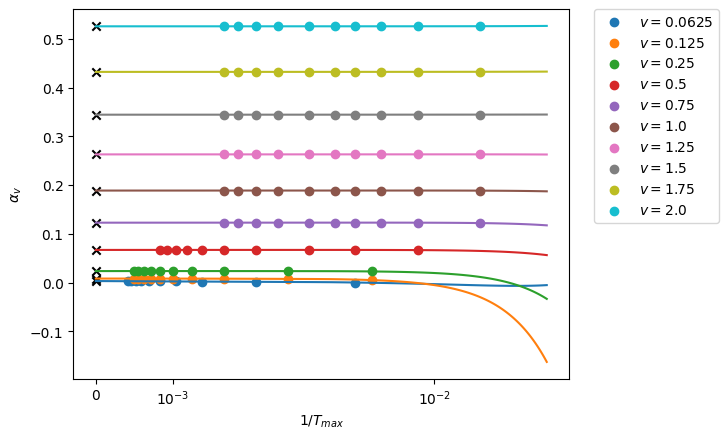

In [16]:
X = np.linspace(0.0, 0.035, num=100)
Y = [fit[i][0]*X**2 + fit[i][1]*X + fit[i][2] for i in range(10)]

for i in range(10):
    pl.plot(X, Y[i])# , label='quadratic fit')
    pl.scatter([0.0], [C[i]], marker='x', color='black') #, label='extrapolation')

pl.scatter(INV_TIME[0], ALPHAV[0], label=r'$v = 0.0625$')
pl.scatter(INV_TIME[1], ALPHAV[1], label=r'$v = 0.125$')
pl.scatter(INV_TIME[2], ALPHAV[2], label=r'$v = 0.25$')
pl.scatter(INV_TIME[3], ALPHAV[3], label=r'$v = 0.5$')
pl.scatter(INV_TIME[4], ALPHAV[4], label=r'$v = 0.75$')
pl.scatter(INV_TIME[5], ALPHAV[5], label=r'$v = 1.0$')
pl.scatter(INV_TIME[6], ALPHAV[6], label=r'$v = 1.25$')
pl.scatter(INV_TIME[7], ALPHAV[7], label=r'$v = 1.5$')
pl.scatter(INV_TIME[8], ALPHAV[8], label=r'$v = 1.75$')
pl.scatter(INV_TIME[9], ALPHAV[9], label=r'$v = 2.0$')

pl.xlabel(r'$1/T_{max}$')
pl.xscale('symlog', linthresh=0.003)
pl.ylabel(r'$\alpha _v$')
# pl.yscale('log')

pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [17]:
ffit = np.polyfit(V, C, 3, rcond=None, full=False, w=None, cov=False)
ffit

array([-0.01726008,  0.12433612,  0.08468651, -0.00373004])

Text(0.5, 0, 'v')

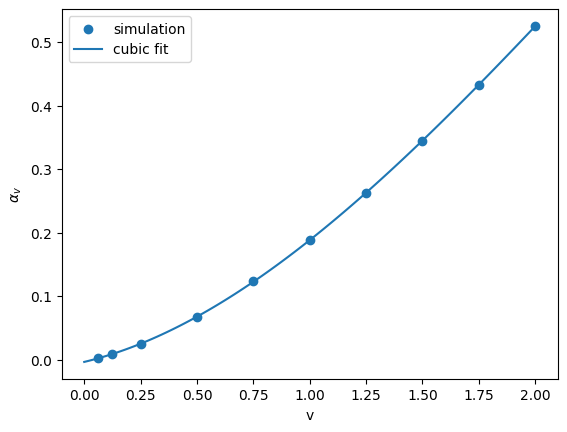

In [18]:
Z = np.linspace(0.0, 2.0, num=100)

pl.scatter(V, C, label='simulation')
pl.plot(Z, ffit[0]*Z**3 + ffit[1]*Z**2 + ffit[2]*Z + ffit[3], label='cubic fit')
pl.legend()
pl.ylabel(r'$\alpha _v$')
pl.xlabel('v')